<a href="https://colab.research.google.com/github/michaelkrisper/CamDesk/blob/master/Collab_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
import math

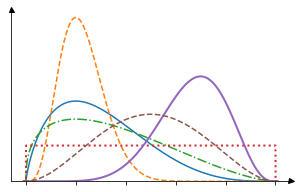

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def pert(xmin, xmode=math.nan, xmax=math.nan, conf=4):
    if math.isnan(xmode) or math.isnan(xmax):
        xmode = xmin
        xmax = xmin
    if xmin == xmax:
        xmin = xmode * 0.99999999
        xmax = xmode * 1.00000001
    if xmax - xmin == 0:
        result = scipy.stats.uniform(xmin, np.finfo(float).eps)
    else:
        a = conf * (xmode - xmin) / (xmax - xmin)
        b = conf * (xmax - xmode) / (xmax - xmin)
        result = scipy.stats.beta(a + 1, b + 1, xmin, (xmax - xmin))
    result.min, result.max, result.mode = xmin, xmax, xmode
    result.range = np.linspace(xmin, xmax, 100)
    result.rangespace = np.linspace(xmin - (xmax - xmin) * .01, xmax + (xmax - xmin) * .01, 100000)
    result.expected = np.mean(result.ppf(np.linspace(0, 1, 10000)))
    return result


a = pert(20, 30, 70, 4)
b = pert(20, 30, 70, 20)
c = pert(20, 30, 70, 2)
d = pert(20, 30, 70, 0)
e = pert(20, 55, 70, 10)
f = pert(20, 45, 70)

x = a.rangespace

fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
plt.plot(x, a.pdf(x), linestyle="-", label="Medium")
plt.plot(x, b.pdf(x), linestyle="--", label="High")
plt.plot(x, c.pdf(x), linestyle="-.", label="Low")
plt.plot(x, d.pdf(x), linestyle=":", label="Very Low", linewidth=2)
plt.plot(x, e.pdf(x), linestyle="-", label="Very Low", linewidth=2)
plt.plot(x, f.pdf(x), linestyle="--", label="Very Low")

plt.axis([None, None, 0, None])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.get_yaxis().set_visible(False)
ax.plot(1, 0, ">k", transform=ax.transAxes, zorder=1, clip_on=False, markersize=5)
ax.plot(0, 1, "^k", transform=ax.transAxes, zorder=1, clip_on=False, markersize=5)


plt.tight_layout(pad=0.1)
plt.savefig("pert-examples.pdf", transparent=True)
plt.show()

from google.colab import files
files.download('pert-examples.pdf')



In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1QSr6Ds_l2XBu6SFL_vgnv100Xa6iFtQr


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

In [ ]:
a=pert(20, 30, 70, 14)
b=pert(20, 30, 70, 4)
c=pert(20, 30, 70, 2)
d=pert(20, 30, 70, 0)

x = a.rangespace

fig, ax = plt.subplots(1, 1, figsize=(3, 2.4))
plt.plot(x, a.pdf(x), linestyle="-", color="C0", label="Very high conf. (λ=14)")
plt.plot(x, b.pdf(x), linestyle="--", color="C2", label="Normal conf. (λ=4)")
plt.plot(x, c.pdf(x), linestyle="-.", color="C3", label="Low conf. (λ=2)")
plt.plot(x, d.pdf(x), linestyle=":", color="C1", label="Very low conf. (λ=0)", linewidth=2)


plt.axis([None, None, 0, None])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.plot(1, 0, ">k", transform=ax.transAxes, zorder=1, clip_on=False, markersize=5)
ax.plot(0, 1, "^k", transform=ax.transAxes, zorder=1, clip_on=False, markersize=5)
legend = plt.legend(title="PERT[20-30-70, λ]:")
legend._legend_box.align = "left"
#legend.get_title().set_fontsize("large")

plt.tight_layout(pad=0.2)
plt.savefig("confidence.pdf", transparent=True)
plt.show()

NameError: ignored

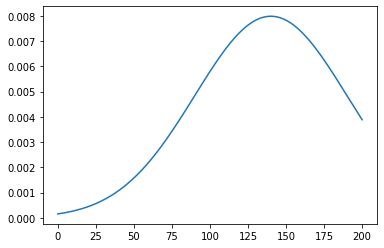

In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 185  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
import math
x = np.linspace(0, 200, 1000)
plt.plot(x, st.norm(slider_value, 50).pdf(x))



In [ ]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
import IPython
js_code = '''
document.querySelector("#output-area").appendChild(document.createTextNode("hello world!"));
'''
display(IPython.display.Javascript(js_code))

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');

In [ ]:
from sympy import *
n, ub, lb, mu, i, j = symbols("n ub lb \mu i j")

x = [ub, lb]
x = IndexedBase("x")

n = 2
mu = Sum(x[i], (i, 1, n))/n
display(mu), display(mu.doit())

f1 = sqrt(1/n*Sum((mu - x[j])**2, (j, 1, n)))
display(f1)
f2 = f1.doit()

N(simplify(f2))

  2       
 ___      
 ╲        
  ╲   x[i]
  ╱       
 ╱        
 ‾‾‾      
i = 1     
──────────
    2     

x[1]   x[2]
──── + ────
 2      2  

                                     ________________________________
                                    ╱    2                           
                                   ╱  ________                       
                                  ╱   ╲                              
                                 ╱     ╲                           2 
                                ╱       ╲      ⎛          2       ⎞  
                               ╱         ╲     ⎜         ___      ⎟  
                              ╱           ╲    ⎜         ╲        ⎟  
                             ╱             ╲   ⎜          ╲   x[i]⎟  
                            ╱               ╲  ⎜          ╱       ⎟  
0.707106781186548⋅         ╱                ╱  ⎜         ╱        ⎟  
                          ╱                ╱   ⎜         ‾‾‾      ⎟  
                         ╱                ╱    ⎜        i = 1     ⎟  
                        ╱                ╱     ⎜-x[j] + ──────────⎟  
                    

                    0.5
    ⎛             2⎞   
0.5⋅⎝(x[1] - x[2]) ⎠   

In [ ]:
import scipy
import scipy.stats as st

st.norm().ppf(0.95)-st.norm().ppf(0.05)



3.289707253902945

In [ ]:
import requests  # Import the requests library

# Query URL
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/nama_10_gdp?precision=1'
       '&unit=CLV05_MEUR'  # Unit: CLV (2005) Million EUR
       '&geo=NL&geo=DE'  # Country: Netherlands, Germany
       '&time=2010&time=2011&time=2012'  # Years: 2010, 2011, 2012
       '&na_item=B1GQ&na_item=D21'  # GDP (market prices) & taxes on products
       )
# Some api's will have nicer syntax like:
# `&time=2010..2012` or `&na_item=B1GQ,D21`
print(url)

response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)
# NOTE: Could use print(response.json()) but this wouldn't be formatted nicely

http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?precision=1&unit=CLV05_MEUR&geo=NL&geo=DE&time=2010&time=2011&time=2012&na_item=B1GQ&na_item=D21
Request returned 200 : 'OK'
{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'DE': 0, 'NL': 1},
                                    'label': {'DE': 'Germany (until 1990 '
                                                    'former territory of the '
                                                    'FRG)',
                                              'NL': 'Netherlands'}},
                       'label': 'geo'},
               'na_item': {'category': {'index': {'B1GQ': 0, 'D21': 1},
                                        'label': {'B1GQ': 'Gross domestic '
                                                          'product at market '
                                                          'prices',
                                                  'D21': 'Taxes on products'}},
                      